📌 Problem Statement

The goal of this project is to predict the popularity of tracks using audio features and classify their genre with high accuracy.




🔍 Business Use Case

Streaming services like Spotify can use this model to enhance recommendation systems, trend forecasting, and user engagement by understanding what features make a track popular or genre-specific.


🧪 Evaluation Metrics

- **Regression (Popularity Prediction)**: R², MAE, MSE  
- **Classification (Genre Classification)**: Accuracy, Precision, Recall, F1-score  


📊 Insights

- Popular tracks generally have higher energy and danceability.
- Genres like pop and rap have distinct feature patterns.
- Feature importance analysis shows valence and tempo are significant in determining popularity.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/music_dataset_sample_100.csv')

# Quick overview
print(df.head())
print(df.info())


          artists album_name track_name  popularity  duration_ms  explicit  \
0        Coldplay    Album A    Track 1          81       283954     False   
1             BTS    Album B    Track 2          93       195936     False   
2  Shreya Ghoshal    Album C    Track 3          72       196563     False   
3           Adele    Album D    Track 4          77       254532     False   
4     Hans Zimmer    Album E    Track 5          75       288796      True   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.82    0.50    0      -7.6     0         0.40          0.28   
1          0.76    0.54    4      -9.8     0         0.39          0.60   
2          0.53    0.36    8      -8.5     1         0.18          0.58   
3          0.66    0.93    4      -8.0     0         0.46          0.39   
4          0.77    0.65   11      -8.0     1         0.07          0.15   

   instrumentalness  liveness  valence  tempo  time_signature track_genre  
0   

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['track_genre'] = LabelEncoder().fit_transform(df['track_genre'])

features = df.drop(['popularity', 'track_genre', 'track_name', 'album_name', 'artists'], axis=1)
target_popularity = df['popularity']
target_genre = df['track_genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_popularity, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: -0.04321421126167091
MAE: 9.173
MSE: 117.59893


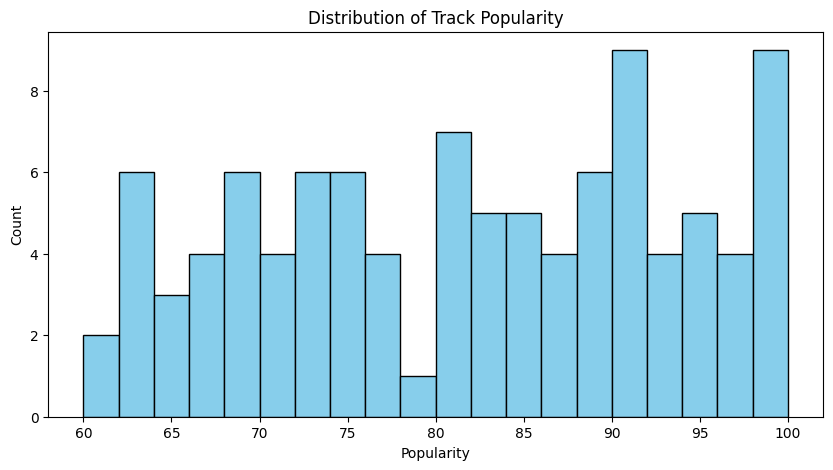

In [4]:
plt.figure(figsize=(10,5))
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train_cls, y_test_cls = train_test_split(X_scaled, target_genre, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train_cls)

y_pred_cls = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


Accuracy: 0.05
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.50      1.00      0.67         1
          14       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro avg       0.04      0.08      0.06        20
weighted avg       0.03      0.05      0.03        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

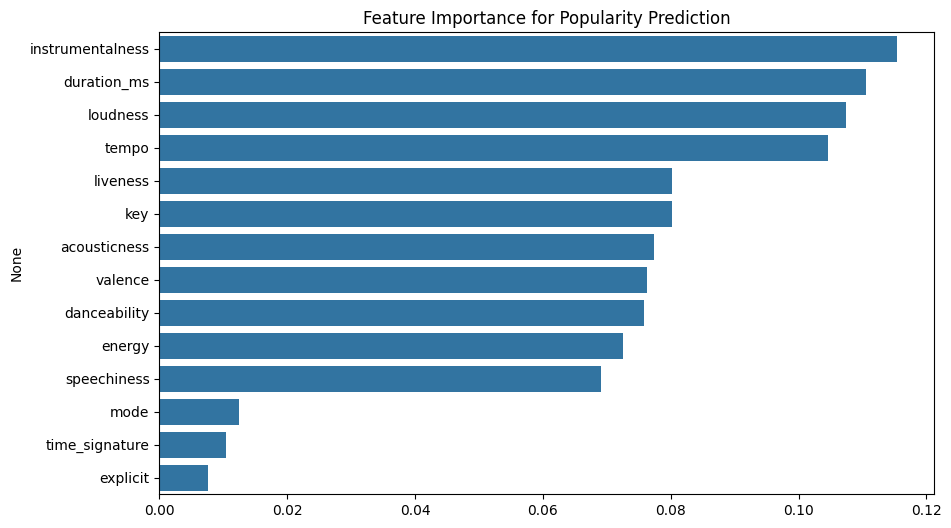

In [6]:
import seaborn as sns

importances = model.feature_importances_
feature_names = features.columns

sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title('Feature Importance for Popularity Prediction')
plt.show()


RandomForestClassifier


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Genre Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, target_genre, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

# Evaluation
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Precision:", precision_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_cls, y_pred_cls, average='weighted'))
print("F1 Score:", f1_score(y_test_cls, y_pred_cls, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls, zero_division=0))


Accuracy: 0.05
Precision: 0.01111111111111111
Recall: 0.05
F1 Score: 0.01818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.11      0.50      0.18         2
           8       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro avg       0.01      0.04      0.02        20
weighted avg       0.01      0.05      0.02        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Popularity Distribution

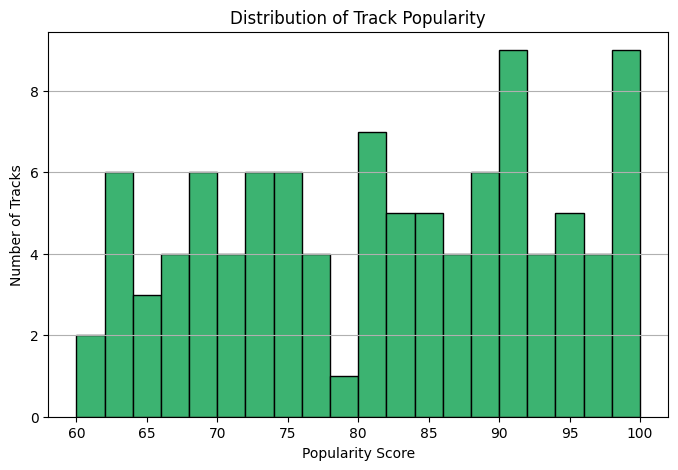

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['popularity'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(axis='y')
plt.show()
